# Bank Churn Predictive Modelling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Exploration

In [2]:
df = pd.read_csv(r"D:\AI\data\Bank_churn_modelling.csv")
df.shape

(10000, 14)

In [3]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [4]:
# unwanted columns - RowNumber, CustomerId, Surname

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Data Cleaning

In [9]:
# check for duplicate entries
df.duplicated().sum()

# df.drop_duplicates(inplace=True)

0

In [10]:
#check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
# drop the unwanted columns
print(df.shape)
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
print(df.shape)

(10000, 14)
(10000, 11)


In [12]:
# check for outliers
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

## Feature Engineering

- Feature Extraction
- Feature Selection

### Correlation Analysis

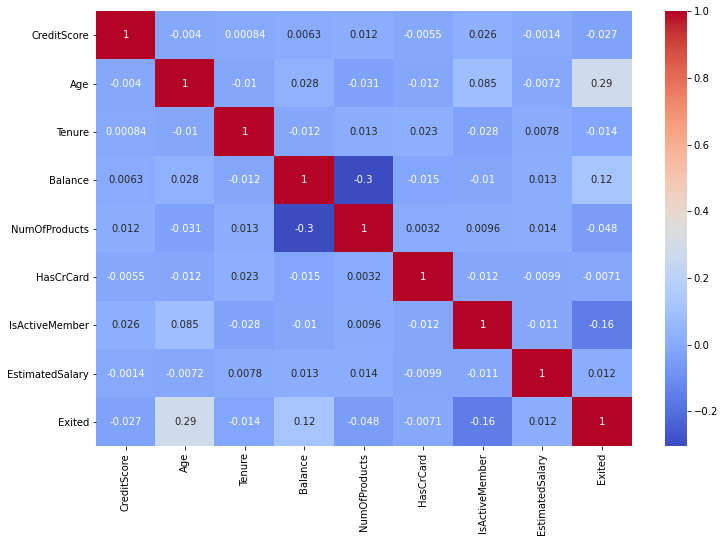

In [13]:
cor = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

In [14]:
# important features - Age, Balance, IsActiveMember

### ANOVA - Analysis of Variance

    - if pvalue < alpha = reject the Null Hypothesis = feature is important
    - if pvalue > alpha = accept the Null Hypothesis = feature is not important
    
Considering CI = 95%
                  
                   alpha = 1 - CI = 1 - 0.95 = 0.05

In [15]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [16]:
nums = ['CreditScore','Age', 'Tenure', 'Balance',
       'NumOfProducts', 'EstimatedSalary']
xd = df[nums]
yd = df['Exited']

from sklearn.feature_selection import f_classif
fscore,pvalue = f_classif(xd,yd)

for i in range(len(nums)):print(nums[i],pvalue[i])

CreditScore 0.006738213892258643
Age 1.2399313093415039e-186
Tenure 0.1615268494952801
Balance 1.275563319153163e-32
NumOfProducts 1.7173330048040421e-06
EstimatedSalary 0.22644042802376574


In [17]:
# important features - CreditScore, Age, Balance, Numofproducts

### Chi Square test
    - if pvalue < alpha = reject the Null Hypothesis = feature is important
    - if pvalue > alpha = accept the Null Hypothesis = feature is not important
    
Considering CI = 95%
                  
                   alpha = 1 - CI = 1 - 0.95 = 0.05

In [18]:
cats = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
       
xd = df[cats]
y = df['Exited']

from sklearn.preprocessing import LabelEncoder
xd['Geography'] = LabelEncoder().fit_transform(xd['Geography'])
xd['Gender'] = LabelEncoder().fit_transform(xd['Gender'])


from sklearn.feature_selection import chi2
cscore,pvalue = chi2(xd,yd)

for i in range(len(cats)):print(cats[i],pvalue[i])

Geography 0.0005756078382573235
Gender 7.015574513879596e-13
HasCrCard 0.6984962089530451
IsActiveMember 1.568036240543455e-27


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
x = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Balance',
       'NumOfProducts', 'IsActiveMember']]
y = df['Exited']

## Preprocessing

In [20]:
x.head(8)

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,Female,42,0.00,1,1
1,608,Spain,Female,41,83807.86,1,1
2,502,France,Female,42,159660.80,3,0
3,699,France,Female,39,0.00,2,0
4,850,Spain,Female,43,125510.82,1,1
5,645,Spain,Male,44,113755.78,2,0
6,822,France,Male,50,0.00,2,1
7,376,Germany,Female,29,115046.74,4,0


In [21]:
pd.get_dummies(df['Geography']).head(8)

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
5,0,0,1
6,1,0,0
7,0,1,0


In [22]:
# encoding
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder, StandardScaler

pipeline = ColumnTransformer([('ohe',OneHotEncoder(drop='first'),[1,2])],remainder='passthrough')
pipeline.fit(x)
x2 = pipeline.transform(x)
x2.shape

(10000, 8)

In [23]:
pd.DataFrame(x2).head(8)

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,619.0,42.0,0.00,1.0,1.0
1,0.0,1.0,0.0,608.0,41.0,83807.86,1.0,1.0
2,0.0,0.0,0.0,502.0,42.0,159660.80,3.0,0.0
3,0.0,0.0,0.0,699.0,39.0,0.00,2.0,0.0
4,0.0,1.0,0.0,850.0,43.0,125510.82,1.0,1.0
5,0.0,1.0,1.0,645.0,44.0,113755.78,2.0,0.0
6,0.0,0.0,1.0,822.0,50.0,0.00,2.0,1.0
7,1.0,0.0,0.0,376.0,29.0,115046.74,4.0,0.0


In [58]:
# train test split
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x2,y,test_size=0.2,random_state=5,stratify=y)
print(x2.shape)
print(xtr.shape)
print(xts.shape)
print(y.shape)
print(ytr.shape)
print(yts.shape)

(10000, 8)
(8000, 8)
(2000, 8)
(10000,)
(8000,)
(2000,)


## Machine Learning - Decision Tree Algorithm

In [59]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy',random_state=5)

In [60]:
# train the model using train dataset
model.fit(xtr,ytr)

DecisionTreeClassifier(criterion='entropy', random_state=5)

In [61]:
# measure the performance using accuracy as a measure - using test data - xts,yts
ypred = model.predict(xts)
from sklearn import metrics
print("Accuracy ",metrics.accuracy_score(yts,ypred))
print("Recall ",metrics.recall_score(yts,ypred))
print("Precision ",metrics.precision_score(yts,ypred))
print("F1 score ",metrics.f1_score(yts,ypred))

Accuracy  0.8075
Recall  0.5405405405405406
Precision  0.5263157894736842
F1 score  0.5333333333333333


In [62]:
# performance of the model on the train data

ypred = model.predict(xtr)
print("Accuracy ",metrics.accuracy_score(ytr,ypred))
print("Recall ",metrics.recall_score(ytr,ypred))
print("Precision ",metrics.precision_score(ytr,ypred))
print("F1 score ",metrics.f1_score(ytr,ypred))

Accuracy  0.999625
Recall  0.998159509202454
Precision  1.0
F1 score  0.9990789069696039


### Overfitting

    - When the model performs poor on test data and performs good on train data
        - performance on test data = bad
        - performance on train data = good
        
        
##### Cause of overfitting
    - the train data has a lot of outliers, noise and exceptional cases which leads to overfitting.
    - the algorithm used is more complex/powerful than the required one for the current dataset.
    - the size of training data is so small that it does not cover enough examples for each scenario for model to learn
    - there are few unwanted noisy features, complex features present in the train dataset.
    
##### How to improve overfitting
    - remove noisy features, remove less important features
    - Collect more data - collect more rows, no need to collect more columns
    - Try a less complex algorithm for the model
    - In case of decision tree, try to reduce the values of max hyperparameters such as max depth, increase the values of min hyperparameters such as min_samples_leaf.
    - In case of K Nearest Neighbour, increase of n_eighbors (value of k).

In [63]:
model = tree.DecisionTreeClassifier(criterion='entropy',random_state=5,
                                    max_depth=8,min_samples_leaf=10,min_samples_split=30)
model.fit(xtr,ytr)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=10,
                       min_samples_split=30, random_state=5)

In [64]:
# measure the performance using accuracy as a measure - using test data - xts,yts
ypred = model.predict(xts)
from sklearn import metrics
print("Accuracy ",metrics.accuracy_score(yts,ypred))
print("Recall ",metrics.recall_score(yts,ypred))
print("Precision ",metrics.precision_score(yts,ypred))
print("F1 score ",metrics.f1_score(yts,ypred))

Accuracy  0.8615
Recall  0.4692874692874693
Precision  0.7579365079365079
F1 score  0.5796661608497723


In [65]:
# performance of the model on the train data

ypred = model.predict(xtr)
print("Accuracy ",metrics.accuracy_score(ytr,ypred))
print("Recall ",metrics.recall_score(ytr,ypred))
print("Precision ",metrics.precision_score(ytr,ypred))
print("F1 score ",metrics.f1_score(ytr,ypred))

Accuracy  0.870875
Recall  0.5134969325153375
Precision  0.7771587743732591
F1 score  0.6183967491688216


### Hyperparameter Tuning

In [66]:
params = {'max_depth':np.arange(3,20,2),
          'min_samples_split':np.arange(20,80,5),
          'min_samples_leaf':np.arange(10,50,5)}
params

{'max_depth': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19]),
 'min_samples_split': array([20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]),
 'min_samples_leaf': array([10, 15, 20, 25, 30, 35, 40, 45])}

In [36]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(tree.DecisionTreeClassifier(random_state=5),param_grid=params,
                     scoring='f1',cv=5,n_jobs=-1,verbose=True)

search.fit(x2,y)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   17.2s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=5), n_jobs=-1,
             param_grid={'max_depth': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_leaf': array([10, 15, 20, 25, 30, 35, 40, 45]),
                         'min_samples_split': array([20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])},
             scoring='f1', verbose=True)

In [37]:
search.best_score_

0.5786239203701411

In [38]:
search.best_params_

{'max_depth': 11, 'min_samples_leaf': 25, 'min_samples_split': 20}

### Underfitting

    - poor performance on train data and poor performance on test data
        - performance on train data = bad
        - performance on test data = bad
        

##### Cause of underfitting
    - the machine learning algorithm is less complex or inefficient to learn patterns
    - All the informative features are not present in the dataset
    - Noisy features
    
    
#### how to handle underfitting model
    - try a more complex learning algorithm
    - collect more columns/features, no need to collect more rows
    - In case of decision tree, increase the values of max hyperparameters such as max depth, decrease the value of min hyperparameters such as min_samples_spli
    - In case of KNN, decrease the value of n_neighbors (value of k)
    

### Visualizing Decision Tree

In [67]:
model2 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=5,
                                    min_samples_leaf=30,min_samples_split=50)
model2.fit(xtr,ytr)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=30,
                       min_samples_split=50, random_state=5)

In [68]:
x.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Balance', 'NumOfProducts',
       'IsActiveMember'],
      dtype='object')

In [41]:
f_names = ['Geo_germany','Geo_Spain', 'Gender','CreditScore', 'Age', 'Balance', 'NumOfProducts',
       'IsActiveMember']
c_names= ['Not Exited','Exited']

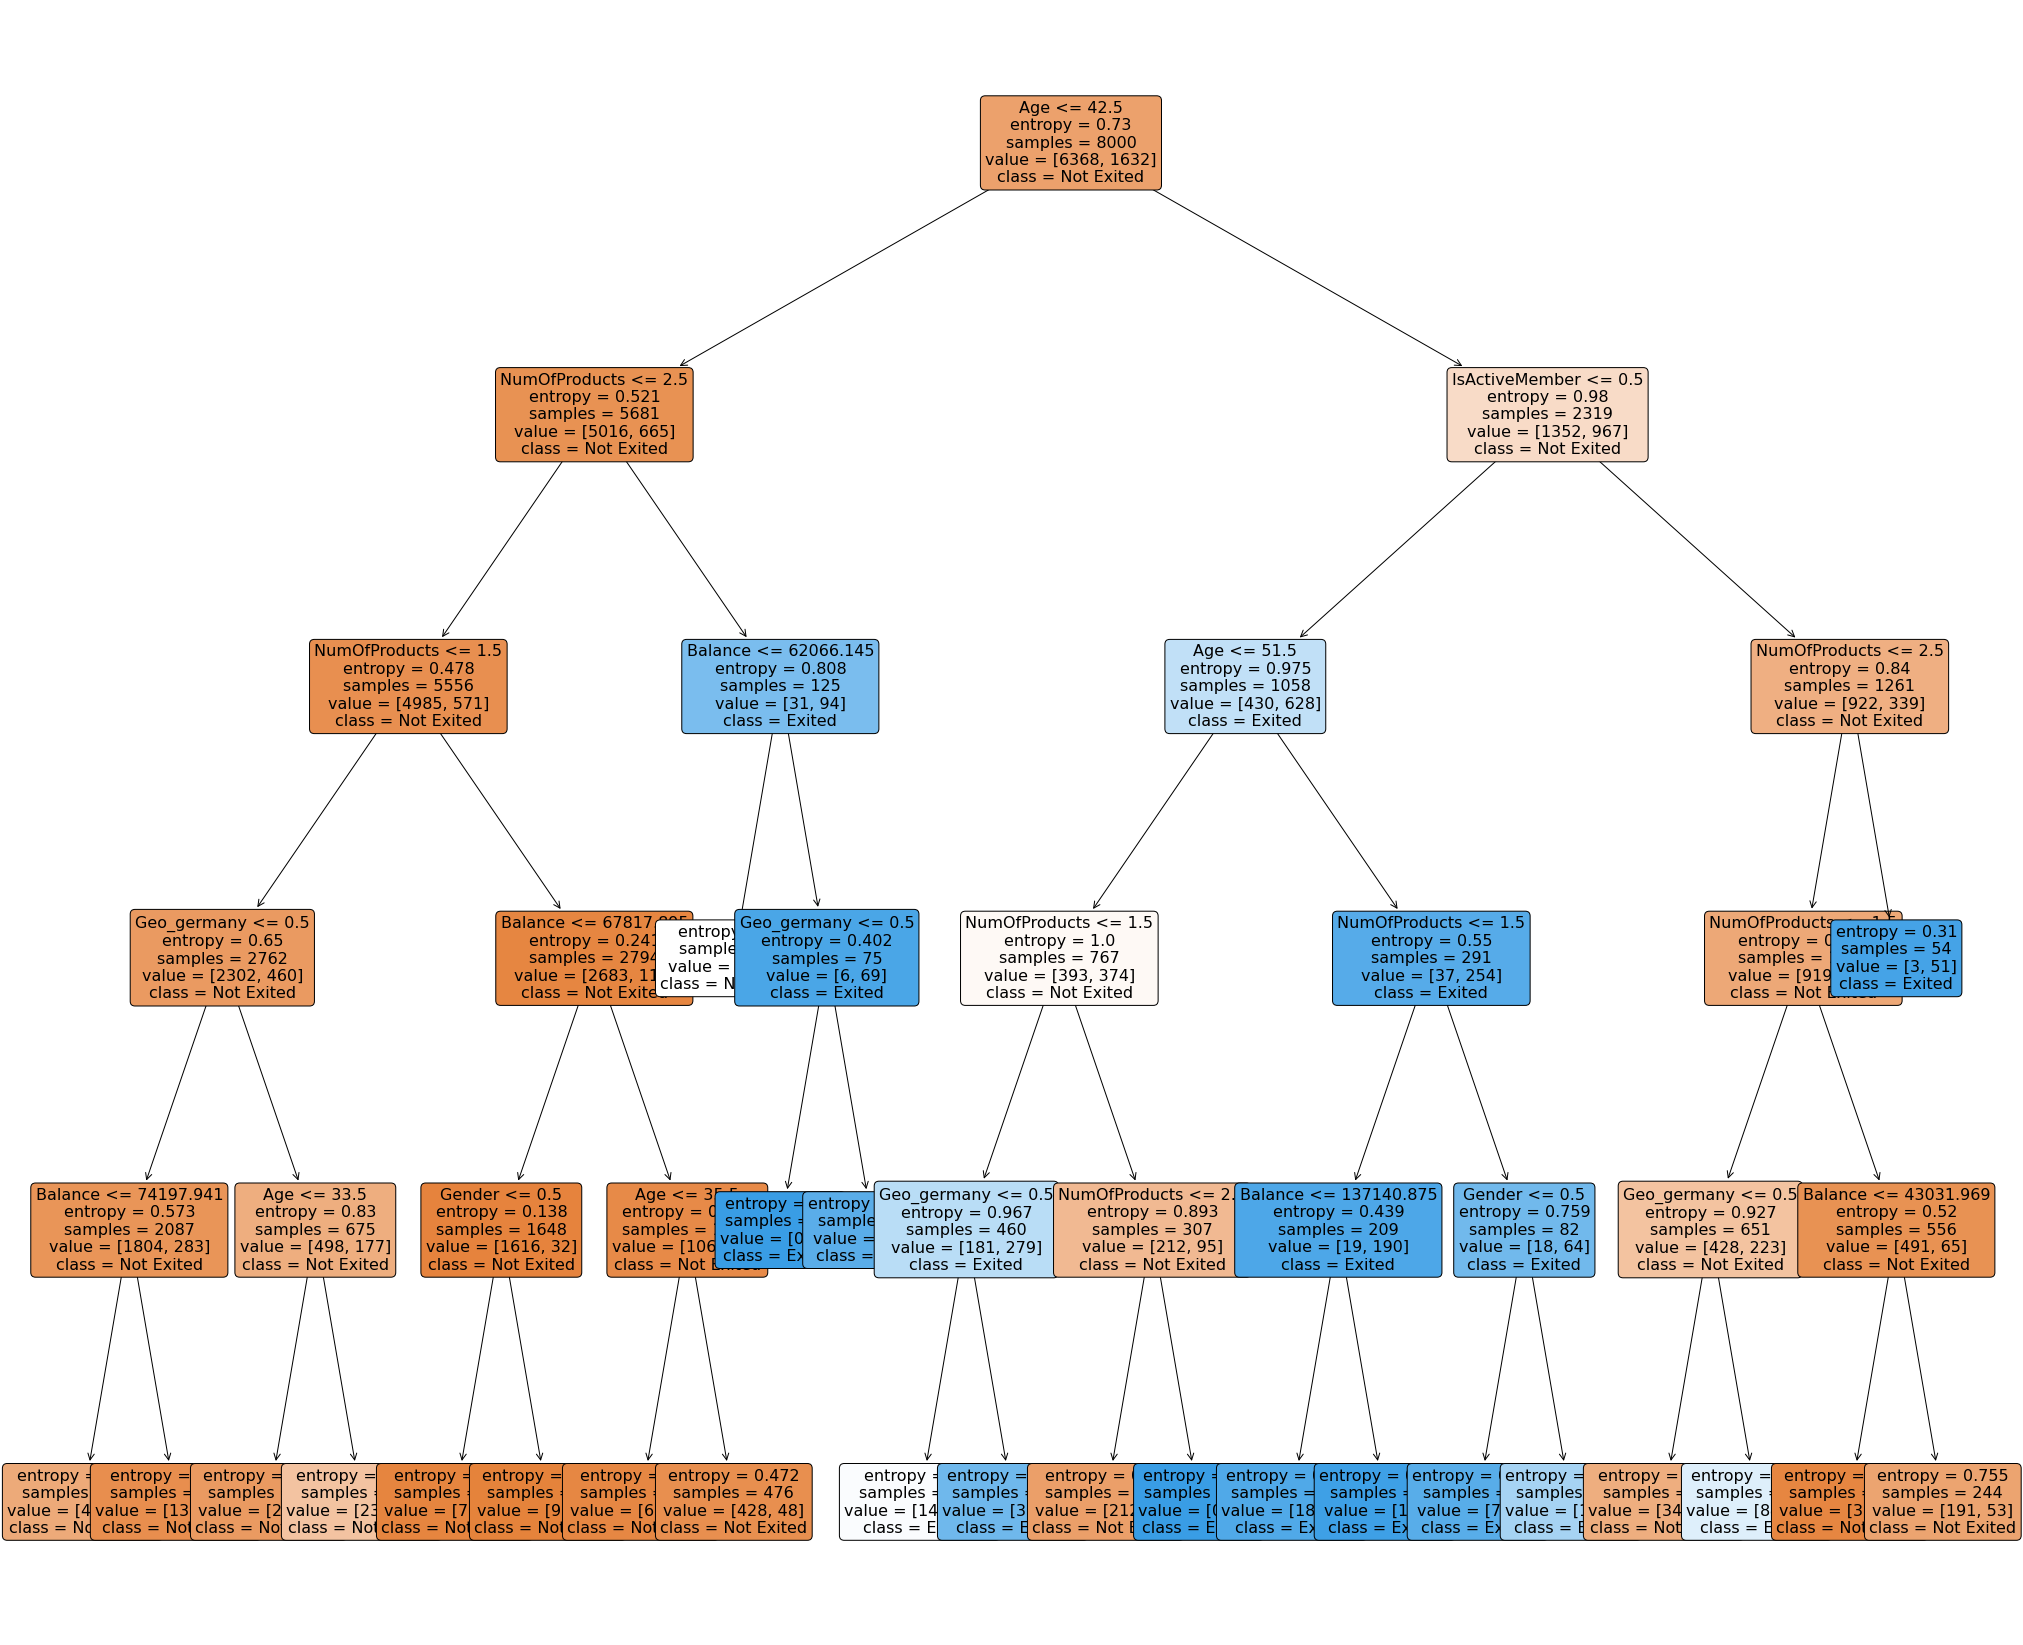

In [52]:
plt.figure(figsize=(35,30))
tree.plot_tree(model2,feature_names=f_names,class_names=c_names,
              rounded=True,filled=True,fontsize=16)
plt.show()

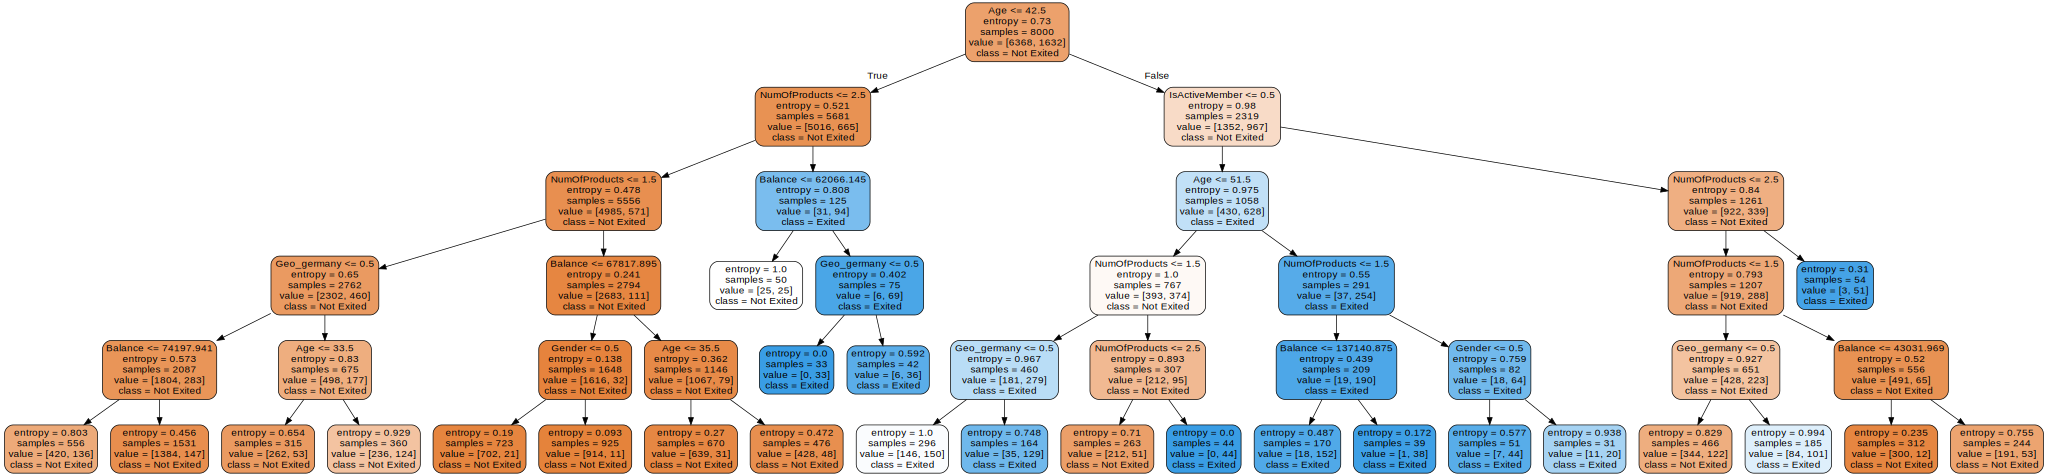

In [53]:
# conda install graphviz

import graphviz

graph_data = tree.export_graphviz(model2,feature_names=f_names,class_names=c_names,
                                 rounded=True,filled=True)
graph = graphviz.Source(graph_data)
graph

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


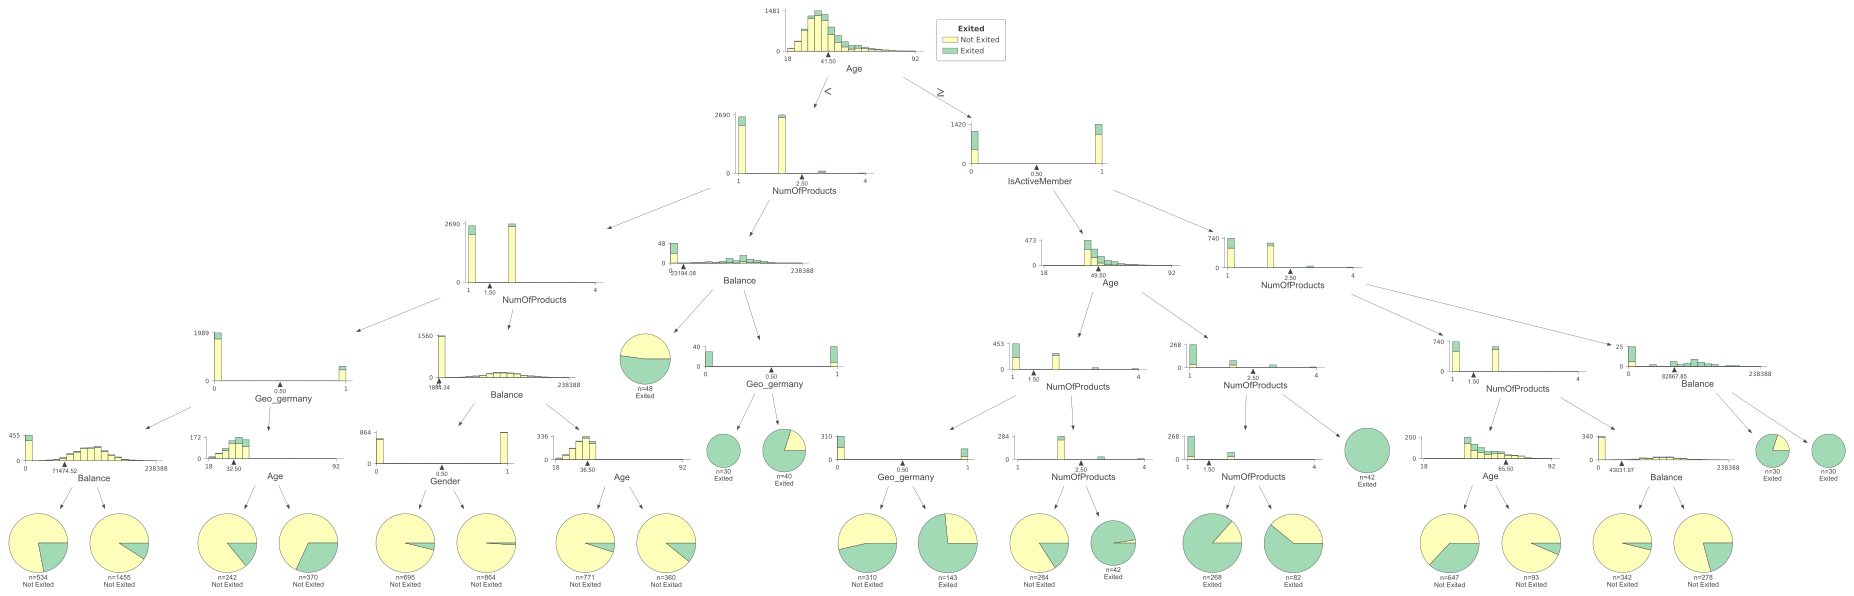

In [70]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(model2,xtr,ytr,target_name='Exited',feature_names=f_names,class_names=c_names)

viz